In [1]:
# This project uses Jupiter notebook to perform data acquisition, manipulation and reporting.
# Covid-19 data from Victoria, Australia are used.
# Data source: https://www.coronavirus.vic.gov.au/victorian-coronavirus-covid-19-data.
# Data acquisition date: 29-Nov-2021

In [2]:
# We first load the Python modules going to be used in this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load the .csv datasets downloaded from the Victorian Government website

df_age = pd.read_csv('NCOV_COVID_Cases_by_Age_Group_20211128.csv')
# Below two comands are for future studies
# df_lga = pd.read_csv('NCOV_COVID_Cases_by_LGA_20211128.csv')
# df_source = pd.read_csv('NCOV_COVID_Cases_by_Source_20211128.csv')

In [4]:
# Inspect the dataframe and understand the details of the datasets (eg.columns,rows,etc)
# If the file is not extremely large, open the .csv file in excel to check as well

# We first inspect df_age. We find df_age has two columns (diagnosis_date and agegroup),\
# a total of 119815 non-null rows for both columns. Data types are object (or strings) for both column.
print(df_age.head())
#print(df_age.tail())
print(len(df_age))
print(df_age.info())

  diagnosis_date agegroup
0     2020-03-11    20-29
1     2020-03-08    60-69
2     2020-03-09    70-79
3     2020-08-01    30-39
4     2020-03-01    30-39
119815
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119815 entries, 0 to 119814
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   diagnosis_date  119815 non-null  object
 1   agegroup        119815 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB
None


In [5]:
# The data seems quite clean. The data analytics team must have done a great job!
# We can directly use the data the perform further analysis. We use the df_age again.

print(df_age.head())
# We group the df_age data by 'agegroup', count the number of cases in each age group, then reset index for the new table
df_age_count = df_age.groupby(['agegroup']).diagnosis_date.count().reset_index()

# Oops! There are some minor issues in the new table. Do a bit data cleaning.
# We change the column 'diagnosis_date' to 'NumberofCases' for the new table.
df_age_count.replace('10-19_','10-19',inplace=True)
df_age_count.replace('Age unknown','unknown',inplace=True)
df_age_count.rename(columns = {'diagnosis_date':'NumberofCases'},inplace=True)

# We create a new column called 'Percent' calculating the percentage of cases for each age group
df_age_count['Percent'] = round(df_age_count['NumberofCases']/df_age_count['NumberofCases'].sum()*100,2)

# print the new df_age_count table. Now there are three columns
print(df_age_count)

  diagnosis_date agegroup
0     2020-03-11    20-29
1     2020-03-08    60-69
2     2020-03-09    70-79
3     2020-08-01    30-39
4     2020-03-01    30-39
   agegroup  NumberofCases  Percent
0       0-9          17680    14.76
1     10-19          18165    15.16
2     20-29          23720    19.80
3     30-39          20489    17.10
4     40-49          14709    12.28
5     50-59          11053     9.23
6     60-69           6571     5.48
7     70-79           3674     3.07
8     80-89           2575     2.15
9       90+           1173     0.98
10  unknown              6     0.01


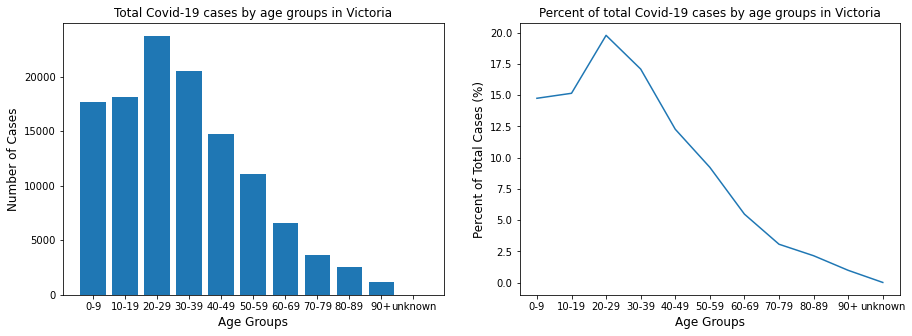

In [6]:
# We use Matplotlib to visualize the data by age groups

x = df_age_count.agegroup
y1 = df_age_count.NumberofCases
y2 = df_age_count.Percent

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.bar(x,y1)
ax1.set_title('Total Covid-19 cases by age groups in Victoria',size=12)
ax1.set_xlabel('Age Groups',size=12)
ax1.set_ylabel('Number of Cases',size=12)

ax2.plot(x,y2)
ax2.set_title('Percent of total Covid-19 cases by age groups in Victoria',size=12)
ax2.set_xlabel('Age Groups',size=12)
ax2.set_ylabel('Percent of Total Cases (%)',size=12)

plt.show()

In [7]:
# Now we see the top Covid-19 case age groups are 20-29,30-39,10-19 and 0-9. They contribute to 2/3 of total cases.
# This is interesting. Is it because these age groups are more socialy activitive than others?
# Or is it just a reflection of the age distribution in the general population? Let dig into it.

In [8]:
# We obtain the population data from the Australian Bureau of Statistics, reported in March 2021
df_pop = pd.read_csv('ABS_AgeData_2021.csv')
print(df_pop.head())

  Age group (years) New South Wales Victoria Queensland South Australia  \
0               0–4         494,107  399,074    313,797          98,283   
1               5–9         512,674  416,631    339,219         106,027   
2             10–14         500,844  397,012    345,180         105,492   
3             15–19         468,218  376,773    318,826         101,919   
4             20–24         539,956  471,073    338,683         114,378   

  Western Australia Tasmania Northern Territory Australian Capital Territory  \
0           171,933   29,020             17,770                       27,753   
1           175,153   31,702             17,803                       28,855   
2           170,545   33,316             16,977                       26,005   
3           154,806   31,005             15,125                       23,838   
4           166,747   31,637             16,089                       32,600   

   Australia  
0  1,551,905  
1  1,628,353  
2  1,595,668  
3  1,490

In [9]:
# We see the data are nicely break down into different age groups for each state/territory
# Let's get the Victoria data only
df_pop_vic = df_pop[['Age group (years)','Victoria']]
# We rename the columns
df_pop_vic.columns = ['Agegroup','VIC']
print(df_pop_vic)

        Agegroup      VIC
0            0–4  399,074
1            5–9  416,631
2          10–14  397,012
3          15–19  376,773
4          20–24  471,073
5          25–29  534,995
6          30–34  533,551
7          35–39  495,301
8          40–44  425,202
9          45–49  431,094
10         50–54  402,683
11         55–59  390,448
12         60–64  361,015
13         65–69  314,351
14         70–74  274,620
15         75–79  193,263
16         80–84  136,717
17         85–89   83,806
18         90–94   42,322
19         95–99   12,258
20  100 and over    1,671


In [10]:
# We notice in df_age_count the age groups are with an interval of 10 years. Let's change the df_pop_vic to be the same.

# We first remove the comma ',' in the data and change the 'VIC' data from string to integer
for i in range(len(df_pop_vic['VIC'])):
    df_pop_vic['VIC'][i] = df_pop_vic['VIC'][i].replace(',','')    

print(df_pop_vic)
df_pop_vic['VIC'] = df_pop_vic['VIC'].astype(int)

        Agegroup     VIC
0            0–4  399074
1            5–9  416631
2          10–14  397012
3          15–19  376773
4          20–24  471073
5          25–29  534995
6          30–34  533551
7          35–39  495301
8          40–44  425202
9          45–49  431094
10         50–54  402683
11         55–59  390448
12         60–64  361015
13         65–69  314351
14         70–74  274620
15         75–79  193263
16         80–84  136717
17         85–89   83806
18         90–94   42322
19         95–99   12258
20  100 and over    1671


C:\Users\Huanhuan WANG\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Huanhuan WANG\miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# We print the data types. We see the 'Agegroup' are strings and the 'VIC' are now integers
print(df_pop_vic.dtypes)

# We need to aggregate the data to be with an inteval of 10 years. For example, '0-4' and '5-9' should be combined to '0-9'
n = 2
df_pop_vic_brief = df_pop_vic.groupby(df_pop_vic.index // n).sum().reset_index()
df_pop_vic_brief.columns = ['agegroup','VIC_pop']
df_pop_vic_brief['VIC_pop'].iloc[9] = df_pop_vic_brief['VIC_pop'].iloc[9:].sum()
df_pop_vic_clean = df_pop_vic_brief.iloc[0:10]

print(df_pop_vic_clean)

Agegroup    object
VIC          int32
dtype: object
   agegroup  VIC_pop
0         0   815705
1         1   773785
2         2  1006068
3         3  1028852
4         4   856296
5         5   793131
6         6   675366
7         7   467883
8         8   220523
9         9    56251


C:\Users\Huanhuan WANG\miniconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# Some additional edits

as_list = df_pop_vic_clean['agegroup'].index.tolist()

for i,x in enumerate(as_list):
    idx = as_list.index(i)
    if i == 0:
        as_list[idx] = '0-9'
    elif i == 9:
        as_list[idx] = '90+'
    else:
        as_list[idx] = str(x) + '0' + '-' + str(x) + '9'
    df_pop_vic_clean['agegroup'] = as_list

print(df_pop_vic_clean)

  agegroup  VIC_pop
0      0-9   815705
1    10-19   773785
2    20-29  1006068
3    30-39  1028852
4    40-49   856296
5    50-59   793131
6    60-69   675366
7    70-79   467883
8    80-89   220523
9      90+    56251


C:\Users\Huanhuan WANG\miniconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [13]:
# We obtain data from df_age_count for Covid-19 case for each age groups
# We only want columns 'agegroup' and 'NumberofCases' from df_age_count. We drop the 'unknown' row as well.

df_age_count_clean = df_age_count[['agegroup','NumberofCases']].iloc[0:10]
print(df_age_count_clean)

  agegroup  NumberofCases
0      0-9          17680
1    10-19          18165
2    20-29          23720
3    30-39          20489
4    40-49          14709
5    50-59          11053
6    60-69           6571
7    70-79           3674
8    80-89           2575
9      90+           1173


In [14]:
# Great! We can now combine df_age_count_clean and df_pop_vic_clean to perform calculations.

df_age_pop_clean = df_age_count_clean.merge(df_pop_vic_clean, how= 'inner')
# Add a column for the percentage of Covid-19 cases in population for each age group, another column for percentage of all cases
df_age_pop_clean['Percent_Covid_pop'] = round(df_age_pop_clean['NumberofCases']/df_age_pop_clean['VIC_pop'] * 100,2)
df_age_pop_clean['Percent_of_all_cases'] =round(df_age_pop_clean['NumberofCases']/df_age_pop_clean['NumberofCases'].sum()*100,2)
print(df_age_pop_clean)

  agegroup  NumberofCases  VIC_pop  Percent_Covid_pop  Percent_of_all_cases
0      0-9          17680   815705               2.17                 14.76
1    10-19          18165   773785               2.35                 15.16
2    20-29          23720  1006068               2.36                 19.80
3    30-39          20489  1028852               1.99                 17.10
4    40-49          14709   856296               1.72                 12.28
5    50-59          11053   793131               1.39                  9.23
6    60-69           6571   675366               0.97                  5.48
7    70-79           3674   467883               0.79                  3.07
8    80-89           2575   220523               1.17                  2.15
9      90+           1173    56251               2.09                  0.98


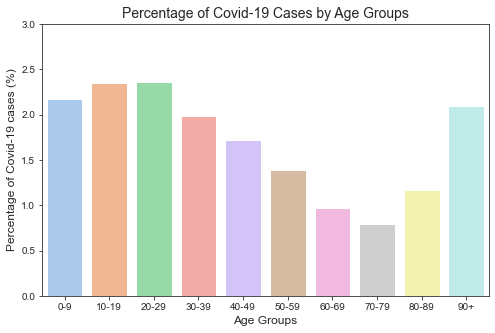

In [15]:
# We use Seaborn to plot the data

sns.set_style("ticks")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(data=df_age_pop_clean, x='agegroup', y='Percent_Covid_pop')
plt.ylim([0,3])
plt.ylabel('Percentage of Covid-19 cases (%)',size=12)
plt.xlabel('Age Groups',size=12)
plt.title('Percentage of Covid-19 Cases by Age Groups',size=14)

plt.show()

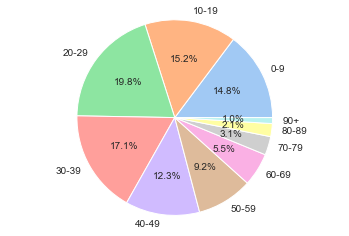

In [16]:
# It is a good idea to use pie chart to show the percentage of all cases

plt.pie(df_age_pop_clean['NumberofCases'],labels = df_age_pop_clean['agegroup'],autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [17]:
# The Covid-19 cases seem to be age dependent.
# The '0-39' age groups have relatively higher infection rates. This could be a result of more solcial activities such as going to work, attending school, entertainment acitivies, etc.
# The '40-79' age group have relatively lower infection rates, with infection rate decline with age. Maybe they practise Covid safety measures better? Interesting observation!
# The'80-89' and especially the '90+' age groups see a surge of infection rates. There were reports on Covid outbreaks at aged care facilities. Urgent improvements are needed to protect the vulnerable members of the community!
# The Australian Department of Health publishes Covid outbreaks at Aged Care Facilities. https://www.health.gov.au/resources/collections/covid-19-outbreaks-in-australian-residential-aged-care-facilities

# The Vaccination againest Covid-19 is underway in Australia. It would be interesting to know how vaccination affects Covid infections and how each age group respond to the vaccination program.
# Watch out for the next project!